In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,confusion_matrix
%matplotlib inline

In [2]:
dataset=pd.read_csv('111.csv')

In [3]:
dataset.shape

(1118, 11)

In [4]:
dataset.head()

,Date,Time,S&P,Dow_Jones,NASDAQ,Skype（Microsoft）,Cisco,Facebook,Trading_Volume,Prev_Avg_Price,True_Price
0,2019/04/18,2019/04/18 11:30,2897.48,26503.69,7972.08,120.46,54.51,177.82,6786527,65.00,62.55
1,2019/04/18,2019/04/18 12:30,2904.74,26564.22,7993.30,120.80,54.66,178.05,3991540,62.55,64.87
2,2019/04/18,2019/04/18 13:30,2905.30,26570.32,7990.27,121.29,54.65,178.36,1504239,64.75,63.15
3,2019/04/18,2019/04/18 14:30,2906.31,26585.46,7997.15,121.60,54.64,178.35,1098866,63.15,63.11
4,2019/04/18,2019/04/18 15:30,2906.38,26586.35,7995.29,121.68,54.65,178.18,913495,63.11,63.07


In [5]:
dataset.isnull().any()

Date                False
Time                False
S&P                  True
Dow_Jones            True
NASDAQ               True
Skype（Microsoft）    False
Cisco               False
Facebook            False
Trading_Volume      False
Prev_Avg_Price      False
True_Price          False
dtype: bool

/Users/a1/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a1/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/a1/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65288 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/a1/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 65289 missing from current font.
  font.set_text(s, 0, flags=flags)


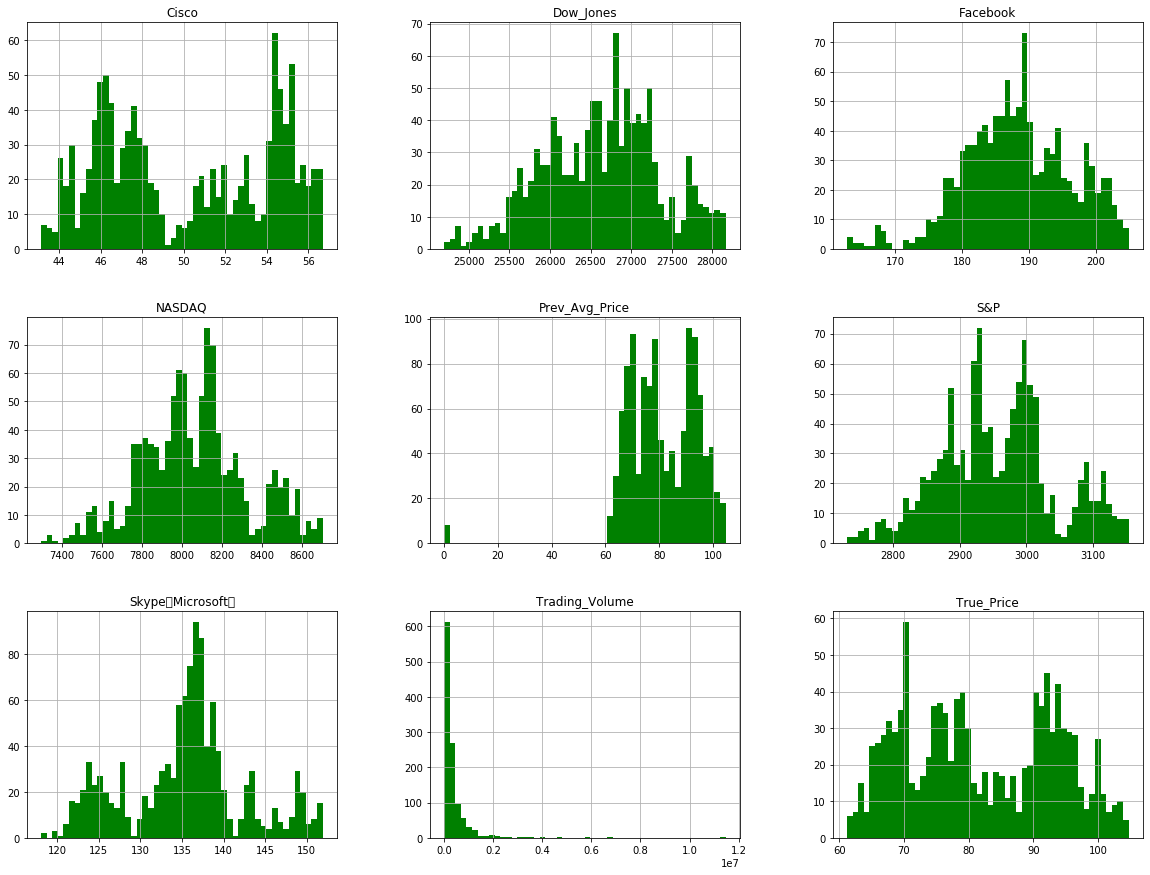

In [6]:
dataset.hist(bins=50,figsize=(20,15),color='green')
plt.show()

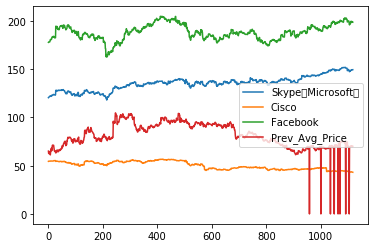

In [7]:
x=dataset['Skype（Microsoft）']
y=dataset['Cisco']
plt.plot(x,label='Skype（Microsoft）')
plt.plot(y,label='Cisco')
m=dataset['Facebook']
n=dataset['Prev_Avg_Price']
plt.plot(m,label='Facebook')
plt.plot(n,label='Prev_Avg_Price')
plt.legend()
plt.show()

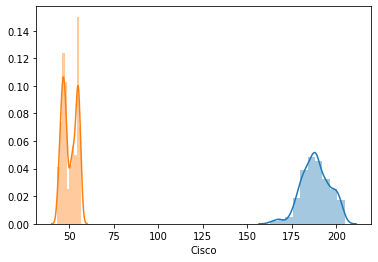

In [8]:
sns.distplot(dataset['Facebook'],kde=True,bins=10)
sns.distplot(dataset['Cisco'],kde=True,bins=10)#both the kde's ovelapped hence teh aveage of both High  and Low lie in similar range

In [9]:
forecast=int(input())

1


In [10]:
dataset=dataset[['Prev_Avg_Price']]
print(dataset.head())

   Prev_Avg_Price
0           65.00
1           62.55
2           64.75
3           63.15
4           63.11


In [11]:
dataset['Prediction']= dataset[['Prev_Avg_Price']].shift(-forecast)

In [12]:
print(dataset.tail())

      Prev_Avg_Price  Prediction
1113           70.62       69.68
1114           69.68       70.09
1115           70.09       70.01
1116           70.01       70.06
1117           70.06         NaN


In [13]:
X = np.array(dataset.drop(['Prediction'],1))

In [14]:
dataset.describe()

,Prev_Avg_Price,Prediction
count,1118.000000,1117.000000
mean,81.407469,81.422158
std,13.279672,13.276531
min,0.000000,0.000000
25%,71.200000,71.200000
50%,79.890000,79.920000
75%,92.185000,92.190000
max,104.730000,104.730000


In [15]:
X = X[:-forecast]

In [16]:
Y = np.array(dataset['Prediction'])

In [17]:
Y = Y[:-forecast]

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [19]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence*100,"%")


svm confidence:  98.96521997037055 %


In [20]:
linear_reg = LinearRegression()
# Train the model
linear_reg.fit(x_train, y_train)

linear_confidence = linear_reg.score(x_test, y_test)
print("linear regression  confidence: ", linear_confidence)

linear regression  confidence:  0.7505643759057831


In [21]:
x_forecast = np.array(dataset.drop(['Prediction'],1))[-forecast:]

print(x_forecast)

[[70.06]]


In [22]:
linear_reg_prediction = linear_reg.predict(x_forecast)
print('Linear Model Prediction is :',linear_reg_prediction)

Linear Model Prediction is : [71.99427117]


In [23]:
svm_prediction = svr_rbf.predict(x_forecast)
print("SVM MODEL prediction is :")
print(svm_prediction)

SVM MODEL prediction is :
[70.08801919]


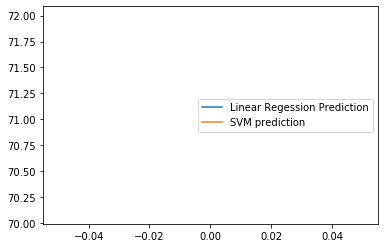

In [24]:
m=linear_reg_prediction
n=svm_prediction
plt.plot(m,label='Linear Regession Prediction')
plt.plot(n,label='SVM prediction')
plt.legend()
plt.show()

In [1]:
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from datetime import timedelta
from tqdm import tqdm
sns.set()
tf.compat.v1.random.set_random_seed(1234)

In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor as mlp
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [5]:
pip install keras

     |████████████████████████████████| 377 kB 29 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [58]:
data = pd.read_csv('1111.csv')
data.head()

,Date,S&P,Dow_Jones,NASDAQ,Skype（Microsoft）,Cisco,Facebook,Trading_Volume,Prev_Avg_Price,True_Price
0,2019/04/18,2897.48,26503.69,7972.08,120.46,54.51,177.82,6786527,65.00,62.55
1,2019/04/18,2904.74,26564.22,7993.30,120.80,54.66,178.05,3991540,62.55,64.87
2,2019/04/18,2905.30,26570.32,7990.27,121.29,54.65,178.36,1504239,64.75,63.15
3,2019/04/18,2906.31,26585.46,7997.15,121.60,54.64,178.35,1098866,63.15,63.11
4,2019/04/18,2906.38,26586.35,7995.29,121.68,54.65,178.18,913495,63.11,63.07


In [59]:
data.tail()

,Date,S&P,Dow_Jones,NASDAQ,Skype（Microsoft）,Cisco,Facebook,Trading_Volume,Prev_Avg_Price,True_Price
1080,2019/12/04,3113.08,27684.15,8567.07,149.01,43.51,198.40,191448,70.62,69.73
1081,2019/12/04,3114.72,27701.76,8569.69,149.18,43.45,198.84,123225,69.68,70.09
1082,2019/12/04,3117.85,27708.31,8579.08,149.37,43.38,199.34,80330,70.09,70.01
1083,2019/12/04,3115.46,27689.86,8572.51,149.32,43.29,198.85,102882,70.01,70.06
1084,2019/12/04,3112.75,27649.78,8566.67,149.44,43.16,198.71,1101493,70.06,69.96


In [60]:
data.shape

(1085, 10)

In [61]:
data= data.values[:, 1:5]

In [134]:
data.shape

(1085, 4)

In [135]:
y= data[1:, 3]

In [136]:
y.shape

(1084,)

In [137]:
X= data[:1085,:]

In [138]:
X.shape

(1085, 4)

In [139]:
y= (y- min(y))/(max(y)- min(y))

In [140]:
y[1080:]

array([0.919350073855244, 0.924963072378139, 0.9234859675036926,
       0.9270310192023634], dtype=object)

In [141]:
X= (X- np.min(X,axis=0))/(np.max(X, axis=0)-np.min(X,axis=0))

In [142]:
split = int(0.8*data.shape[0])
X_train = X[:split]
X_test = X[split:]

y_train = y[:split]
y_test = y[split:]

In [143]:
X_train.shape, y_train.shape

((868, 4), (868,))

In [144]:
X_test.shape, y_test.shape

((217, 4), (216,))

In [145]:
model= mlp(hidden_layer_sizes=(100, 50), activation='relu', solver='adam', verbose=True)

In [146]:
model.fit(X_train, y_train)

Iteration 1, loss = 0.19997923
Iteration 2, loss = 0.07927446
Iteration 3, loss = 0.01811948
Iteration 4, loss = 0.00681365
Iteration 5, loss = 0.01350654
Iteration 6, loss = 0.01266296
Iteration 7, loss = 0.00669801
Iteration 8, loss = 0.00442130
Iteration 9, loss = 0.00484305
Iteration 10, loss = 0.00477135
Iteration 11, loss = 0.00386117
Iteration 12, loss = 0.00314125
Iteration 13, loss = 0.00288809
Iteration 14, loss = 0.00254128
Iteration 15, loss = 0.00210476
Iteration 16, loss = 0.00180101
Iteration 17, loss = 0.00160150
Iteration 18, loss = 0.00140495
Iteration 19, loss = 0.00125632
Iteration 20, loss = 0.00110816
Iteration 21, loss = 0.00096823
Iteration 22, loss = 0.00083490
Iteration 23, loss = 0.00071870
Iteration 24, loss = 0.00061954
Iteration 25, loss = 0.00053270
Iteration 26, loss = 0.00046534
Iteration 27, loss = 0.00039647
Iteration 28, loss = 0.00033986
Iteration 29, loss = 0.00030243
Iteration 30, loss = 0.00028151
Iteration 31, loss = 0.00026303
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 50), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [147]:
y_pred= model.predict(X_test)

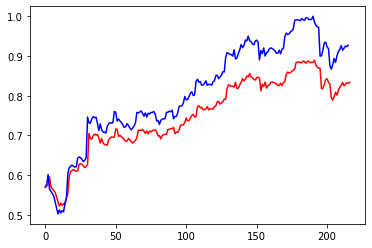

In [149]:
plt.plot(y_pred, 'r-')
plt.plot(y_test, 'b-')
plt.show()

In [155]:
data[:6, :]

array([[2897.48, 26503.69, 7972.08, 120.46],
       [2904.74, 26564.22, 7993.3, 120.8],
       [2905.3, 26570.32, 7990.27, 121.29],
       [2906.31, 26585.46, 7997.15, 121.6],
       [2906.38, 26586.35, 7995.29, 121.68],
       [2905.03, 26559.54, 7998.06, 121.76]], dtype=object)

In [156]:
y= data[1:, 3]

In [157]:
X= data[:1084,:]

In [158]:
y.shape,X.shape

((1084,), (1084, 4))

In [159]:
y= (y- min(y))/(max(y)- min(y))

In [160]:
X= (X- np.min(X,axis=0))/(np.max(X, axis=0)-np.min(X,axis=0))

In [161]:
time_steps= 100
X_new= np.zeros((X.shape[0] - time_steps +1, 100, X.shape[1]))
y_new= np.zeros((y.shape[0] -time_steps +1,))
for ix in range(X_new.shape[0]):
    for jx in range(time_steps):
        X_new[ix, jx, :]= X[ix +jx, :]
    y_new[ix]= y[ix + time_steps -1]
X_new.shape, y_new.shape

((985, 100, 4), (985,))

In [162]:
split = int(0.8*data.shape[0])
X_train = X_new[:split]
X_test = X_new[split:]

y_train = y_new[:split]
y_test = y_new[split:]

X_train.shape, y_train.shape
X_test.shape, y_test.shape

((117, 100, 4), (117,))

In [164]:
import numpy as np
import pandas as pd
from keras.layers import Dense, Dropout, Activation, LSTM, Convolution1D, MaxPooling1D
from keras.models import Sequential
import matplotlib.pyplot as plt
%matplotlib inline

In [165]:
model = Sequential()
model.add(LSTM(100, input_shape= (100,4), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(output_dim=1))
model.add(Activation('linear'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 100)          42000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                30200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 72,251
Trainable params: 72,251
Non-trainable params: 0
__________________________________________________

/Users/a1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`
  


In [166]:
model.compile(loss='mse', optimizer='rmsprop', metrics=['accuracy'])

In [167]:
model.fit(X_train, y_train, batch_size=256, nb_epoch=50, validation_data = (X_test, y_test), verbose=2)

/Users/a1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.



Train on 868 samples, validate on 117 samples
Epoch 1/50
 - 3s - loss: 0.0952 - accuracy: 0.0012 - val_loss: 0.0215 - val_accuracy: 0.0085
Epoch 2/50
 - 2s - loss: 0.0099 - accuracy: 0.0012 - val_loss: 0.0167 - val_accuracy: 0.0085
Epoch 3/50
 - 2s - loss: 0.0098 - accuracy: 0.0012 - val_loss: 0.0060 - val_accuracy: 0.0085
Epoch 4/50
 - 2s - loss: 0.0091 - accuracy: 0.0012 - val_loss: 0.0085 - val_accuracy: 0.0085
Epoch 5/50
 - 2s - loss: 0.0098 - accuracy: 0.0012 - val_loss: 0.0012 - val_accuracy: 0.0085
Epoch 6/50
 - 2s - loss: 0.0154 - accuracy: 0.0012 - val_loss: 0.0011 - val_accuracy: 0.0085
Epoch 7/50
 - 2s - loss: 0.0099 - accuracy: 0.0012 - val_loss: 0.0021 - val_accuracy: 0.0085
Epoch 8/50
 - 2s - loss: 0.0093 - accuracy: 0.0012 - val_loss: 0.0010 - val_accuracy: 0.0085
Epoch 9/50
 - 2s - loss: 0.0131 - accuracy: 0.0012 - val_loss: 0.0017 - val_accuracy: 0.0085
Epoch 10/50
 - 2s - loss: 0.0085 - accuracy: 0.0012 - val_loss: 0.0031 - val_accuracy: 0.0085
Epoch 11/50
 - 2s - lo

In [168]:
score= model.evaluate(X_test, y_test, batch_size=256)

117/117 [==============================] - 0s 721us/step


In [169]:
score

[0.005217383150011301, 0.008547008968889713]

In [170]:
y_pred= model.predict(X_test)

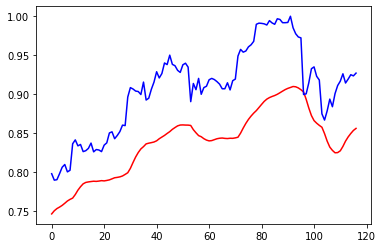

In [171]:
plt.plot(y_pred, 'r-')
plt.plot(y_test, 'b-')
plt.show()